In [1]:
#import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.layouts import gridplot
from bokeh.plotting import figure, output_file, show
from datetime import date

In [2]:
#read the csv file and store as a panda's dataframe
df = pd.read_csv(r"https://covid.ourworldindata.org/data/owid-covid-data.csv")

In [3]:
#.dtypes is used to check the data types of all the columns to get a rough idea of the data you will be working with
df.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                          int64
new_cases                            int64
total_deaths                         int64
new_deaths                           int64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_old

In [4]:
#drop the data/columns not required so improve the processing times
df.drop(['iso_code', 'new_cases_per_million','total_deaths_per_million','new_deaths_per_million','tests_units','population_density','median_age','aged_65_older','aged_70_older','gdp_per_capita','extreme_poverty','cvd_death_rate','diabetes_prevalence','female_smokers','male_smokers','handwashing_facilities','total_tests_per_thousand','new_tests_smoothed_per_thousand'], axis=1, inplace=True)

In [5]:
#date is of the datatype char/object so change it to datetime format so it is easier to plot datetime on x axis
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')

In [6]:
#create a new column with only the year and month
df['year-month'] = df['date'].dt.strftime('%Y-%m')

In [7]:
#set location column as the index
df.set_index('location', inplace=True)
df.head()

,continent,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,total_tests,new_tests,new_tests_per_thousand,new_tests_smoothed,stringency_index,population,hospital_beds_per_thousand,year-month
location,,,,,,,,,,,,,,,
Afghanistan,Asia,2019-12-31,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,38928341.0,0.5,2019-12
Afghanistan,Asia,2020-01-01,0,0,0,0,0.0,NaN,NaN,NaN,NaN,0.0,38928341.0,0.5,2020-01
Afghanistan,Asia,2020-01-02,0,0,0,0,0.0,NaN,NaN,NaN,NaN,0.0,38928341.0,0.5,2020-01
Afghanistan,Asia,2020-01-03,0,0,0,0,0.0,NaN,NaN,NaN,NaN,0.0,38928341.0,0.5,2020-01
Afghanistan,Asia,2020-01-04,0,0,0,0,0.0,NaN,NaN,NaN,NaN,0.0,38928341.0,0.5,2020-01


In [8]:
df_india = df.loc['India',:]
df_us = df.loc['United States',:]
df_world = df.loc['World',:]

In [9]:
df_india.plot.line(x="date", y=["new_cases", "new_deaths"],figsize=(200,100),fontsize=100,linewidth=15.0)
#plt.yscale('log')
plt.legend(fontsize=150)
plt.grid(color='black', linestyle='--', linewidth=3)
plt.tick_params(labelsize=150, pad=5)

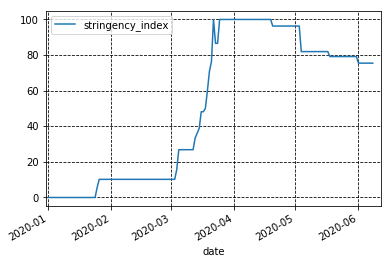

In [10]:
df_india.plot.line(x="date",y="stringency_index")
plt.grid(color='black', linestyle='--')

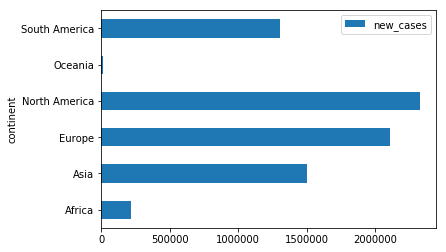

In [11]:
df_cont = df.groupby('continent').sum()
df_cont.plot.barh(y='new_cases')

In [14]:
#df_country = df.groupby('location').sum().sort_values(by='new_cases')
df_country = df.groupby('location').sum().nlargest(10,'new_cases').sort_values(by='new_cases')
df_country.plot.barh(y='new_cases',figsize=(200,100),fontsize=75)
plt.legend(fontsize=150)
plt.tick_params(labelsize=100, pad=20)
plt.tight_layout()